Generate random data for the model:
$$y=\beta_{0}+\beta_{1}x_1+\dots+\beta_{n}x_n+e$$
where $$e\sim N(0,\sigma^{2})$$
and $\beta_{j}$: $$-5\leq \beta_{j} \leq 5$$

In [29]:
import numpy as np
nsample=500     #Number of observations
nvariables=20   #Number of variables
#We make results reproducible in order to obtain always the same random values
np.random.seed(0) 
X0=np.ones([nsample,1])
X1=np.random.uniform(0,10,([nsample,nvariables]))
X=np.concatenate([X0,X1],axis=1)  #Design Matrix
error=np.random.normal(0,1,(nsample,1))
beta=np.random.randint(-5,5,size=([nvariables+1,1]));
Y=np.dot(X,beta)+error
print(beta[:]);

[[-1]
 [-2]
 [-1]
 [-5]
 [-3]
 [ 1]
 [ 2]
 [-4]
 [ 2]
 [-5]
 [ 1]
 [ 0]
 [-3]
 [ 2]
 [ 0]
 [ 1]
 [-2]
 [ 0]
 [-4]
 [ 3]
 [-1]]


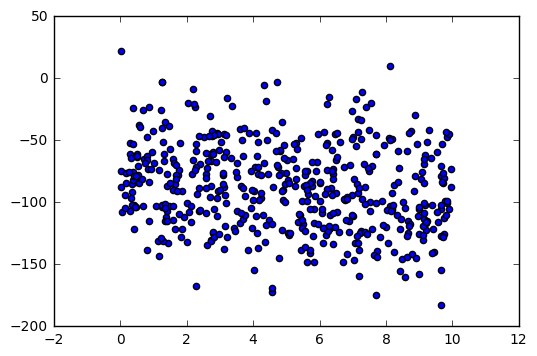

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,1],Y)

**Section a)**

In [31]:
beta_ls=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y) #((X'X)^-1)*transpose(X)*Y
print(beta_ls)

[[ -6.75375408e-01]
 [ -2.02273812e+00]
 [ -9.94584837e-01]
 [ -5.02014810e+00]
 [ -2.99846222e+00]
 [  9.95434764e-01]
 [  2.00611959e+00]
 [ -4.00307472e+00]
 [  1.97887293e+00]
 [ -5.00806856e+00]
 [  9.78777208e-01]
 [  2.50291766e-03]
 [ -3.00448219e+00]
 [  1.98158231e+00]
 [  2.03014114e-02]
 [  1.00374320e+00]
 [ -2.01043574e+00]
 [  9.04926095e-03]
 [ -4.00021103e+00]
 [  3.00141095e+00]
 [ -9.91423564e-01]]


**Section b)**

In [32]:
from pyomo.environ import *
opt = SolverFactory("glpk")
from pyomo.opt import SolverFactory

model=AbstractModel()

model.I = RangeSet(1,nsample)       #Index for observations
model.J = RangeSet(1,nvariables+1)  #Index for variables plus the independent term

model.beta_la = Var(model.J,domain=Reals,bounds=(-5,5))
model.t = Var(model.I,domain=NonNegativeReals)    

def Obj_rule(model):
	return sum(model.t[i] for i in model.I)
model.OBJ = Objective(rule=Obj_rule, sense=minimize)

def abs_constraint_upper(model, i): 
    return -(sum((model.beta_la[j]*X[i-1,j-1]) for j in model.J))-model.t[i]<=-Y[i-1]
model.abs_Constraint_up = Constraint(model.I, rule=abs_constraint_upper)

def abs_constraint_lower(model, i): 
    return -(sum((model.beta_la[j]*X[i-1,j-1]) for j in model.J))+model.t[i]>=-Y[i-1]
model.abs_Constraint_low = Constraint(model.I, rule=abs_constraint_lower)

In [69]:
instance=model.create_instance()
results=opt.solve(instance)
print(results)
print("Objective function %f" %instance.OBJ())
#for j in sequence(1,nvariables+1):
for j in instance.J:
    print("Beta_least_absolute: %.4f;\tBeta_least_square: %.4f;\tDifference: %.4f" %(instance.beta_la[j].value,beta_ls[j-1],np.subtract(instance.beta_la[j].value,beta_ls[j-1])))
    #print(instance.beta_la[j].value,beta_ls[j-1],np.subtract(instance.beta_la[j].value,beta_ls[j-1]))


Problem: 
- Name: unknown
  Lower bound: 367.819392949
  Upper bound: 367.819392949
  Number of objectives: 1
  Number of constraints: 1001
  Number of variables: 522
  Number of nonzeros: 22001
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.218000173569
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function 367.819393
Beta_least_absolute: -0.6364;	Beta_least_square: -0.6754;	Difference: 0.0390
Beta_least_absolute: -2.0292;	Beta_least_square: -2.0227;	Difference: -0.0064
Beta_least_absolute: -1.0009;	Beta_least_square: -0.9946;	Difference: -0.0063
Beta_least_absolute: -5.0000;	Beta_least_square: -5.0201;	Difference: 0.0201
Beta_least_absolute: -3.0044;	Beta_least_square: -2.9985;	Difference: -0.0059
Beta_least_absolute: 0.9900;	Beta_least_square: 0.9954;	Difference: -0.0054
Beta_least_a